In [1]:
%load_ext autoreload
%autoreload 2
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())
from config.settings import *

In [11]:
import torch
from src.models.unet import UNet

unet = UNet(64,5)
I = torch.randn((1,1,1000,1000))
print(unet(I).shape)
print(list(unet.children()))

torch.Size([1, 2, 632, 632])
[ModuleList(
  (0): EncoderBlock(
    (convblock): Sequential(
      (0): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1))
      (1): ReLU()
      (2): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1))
      (3): ReLU()
    )
    (poolblock): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (1): EncoderBlock(
    (convblock): Sequential(
      (0): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
      (1): ReLU()
      (2): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1))
      (3): ReLU()
    )
    (poolblock): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (2): EncoderBlock(
    (convblock): Sequential(
      (0): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1))
      (1): ReLU()
      (2): Conv2d(256, 256, kernel_size=(5, 5), stride=(1, 1))
      (3): ReLU()
    )
    (poolblock): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (3): EncoderBlock(
 

In [9]:
from src.models.unet import find_next_valid_size
find_next_valid_size(1000,5,4)

(1000, 632)

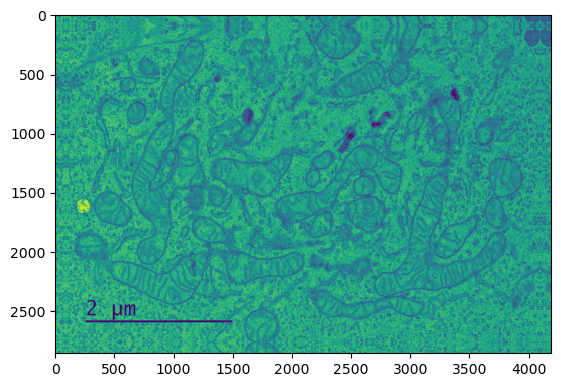

In [6]:
import torch
from torch.nn.functional import unfold, fold
import matplotlib.pyplot as plt
import cv2 as cv
from src.data.loaders import MitoSemsegDataset
from torchvision.transforms.v2 import CenterCrop

dataset = MitoSemsegDataset(TRAIN_ROOT)
src, mask = dataset[81]

input_size = 1004
output_size = 820
model = CenterCrop(output_size)

k, s = input_size, output_size
h, w = src.shape[-2:]
extra_w = (1 + w//output_size)*output_size - w
extra_h = (1 + h//output_size)*output_size - h
p = (input_size-output_size)//2

src = cv.copyMakeBorder(src, p, p+extra_h, p+extra_h, p, cv.BORDER_REFLECT)
src = torch.as_tensor(src)
patches = unfold(src, kernel_size=k, stride=s).permute(1,0).reshape(-1,k,k)
patches = model(patches)
dst = patches.reshape(-1,s*s).permute(1,0)
dst = dst[:-extra_h,extra_w:]

plt.imshow(src)
